# SD-HOC Implementation

## Introduction

The SD-HOC algorithm is a predictive model designed to estimate the number of people in a room using carbon dioxide (CO2) measurements. Human occupancy counting is a valuable task in various domains, such as building automation, energy management, and indoor air quality control. By leveraging the relationship between CO2 concentration and human presence, the SD-HOC algorithm offers a non-intrusive and cost-effective solution for occupancy estimation.

## Visualizing the data

### People Count RGB

We start by importing the necessary libraries and loading the data.

We were using JSON files to store the data.We prefered JSON files because they are easy to read and write, lightweight, and can be parsed easily. We used the JSON library to load the data and convert it to a pandas dataframe.

In [1]:
import sys
import os
import plotly.express as px


from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)


head, _ = os.path.split(sys.path[0])
sys.path[0] = head

import src.utils as utils

# load the data
files =[ '../data/dataset/V6AD_20210211.json',
         '../data/dataset/V6AD_20210212.json',
         '../data/dataset/V6AD_20210213.json',
         '../data/dataset/V6AD_20210214.json',
         '../data/dataset/V6AD_20210215.json',
         '../data/dataset/V6AD_20210216.json']


# # create the dataframes
df = utils.create_df(files)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14685 entries, 0 to 14684
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   deviceID            4209 non-null   object 
 1   time                14685 non-null  int64  
 2   peoplecount_ir_est  4209 non-null   float64
 3   ir_raw_data_array   4209 non-null   object 
 4   occupancy           14685 non-null  int64  
 5   peoplecount_rgb     14685 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 688.5+ KB


As we can see below, the data is stored in a pandas dataframe. The dataframe contains 5 columns: 
- `deviceID` - the ID of the device that collected the data
- `time` - the timestamp of the measurement
- `peoplecount_ir_est` - the number of people in the room estimated by the IR sensor
- `ir_raw_data_array` - the raw data collected by the IR sensor
- `occupancy` - whether the room is occupied or not
- `peoplecount_rgb` - the number of people in the room estimated by the RGB sensor

 > **NB:** The peoplecount_rgb column was supervised by the user. The user had to manually input the number of people in the room at the time of the measurement. This was done to have a ground truth to compare the SD-HOC algorithm's predictions to.


In [3]:
df.head()

,deviceID,time,peoplecount_ir_est,ir_raw_data_array,occupancy,peoplecount_rgb
0,None,1612998020125,NaN,None,0,-7
1,None,1612998074256,NaN,None,0,0
2,MS-IPac67b205b3b7,1612998084000,0.0,"[994, 982, 991, 965, 931, 917, 886, 877, 912, ...",0,0
3,None,1612998136051,NaN,None,0,0
4,None,1612998197341,NaN,None,0,0


A quick overview of the data shows that the data is not clean. The NaN values in deviceID mean that this was only the mesure of the RGB sensor.   
Also some "-7" values in the peoplecount_rgb column are due the server problems.

We can also see that the time is the number of seconds since the epoch. We will convert it to a datetime object for easier manipulation.

We are gonna store the deviceID in a variable because we might need it later.   
We will transform the time column to a datetime object and only keep the columns we need.

In [4]:
# keep only the columns we need
device_id = df['deviceID'].unique()[1]
print(device_id)

# transform epoch time to datetime
df.loc[:, 'time'] = df['time'].apply(utils.epoch_to_datetime)

df = df[['time','peoplecount_ir_est', 'peoplecount_rgb']]

# delete all rows with peoplecount_rgb = -7
df = df[df['peoplecount_rgb'] != -7]

MS-IPac67b205b3b7


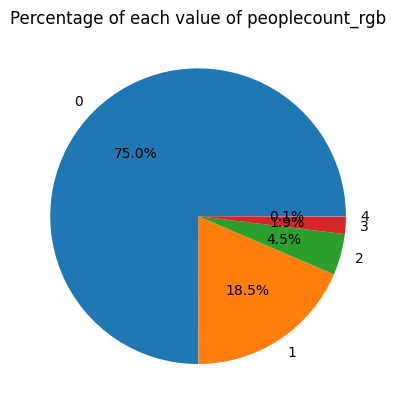

In [5]:
# Calculate value counts for the peoplecount_rgb column
value_counts = df['peoplecount_rgb'].value_counts()
fig = px.pie(values=value_counts.values, names=value_counts.index, title='Percentage of each value of peoplecount_rgb')
fig.show()
# use matplotlib to plot the same pie chart (for github)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%') 
ax.set_title('Percentage of each value of peoplecount_rgb')
plt.show()



As we can see, there are a lot of 0 values in the peoplecount_rgb column. It's okay because these are time series data.

### Time series plot

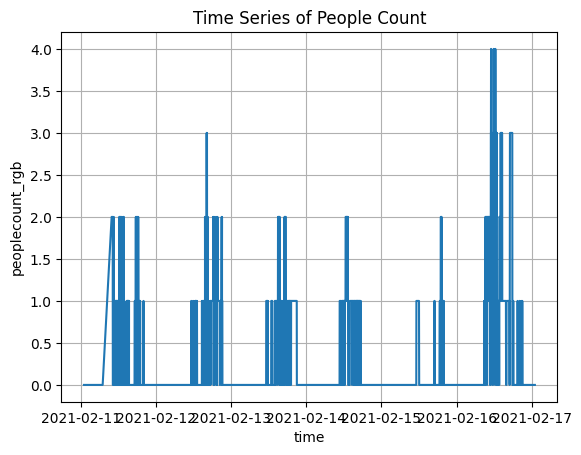

In [6]:
# plot time series of people count
utils.plot_time_series(df)
utils.plot_time_series(df,matplotlib = True,first = False)

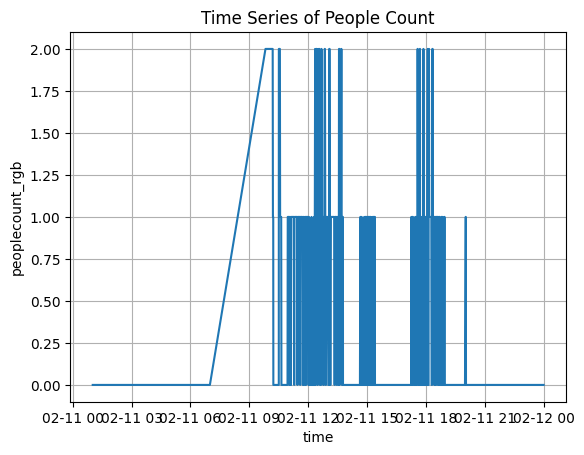

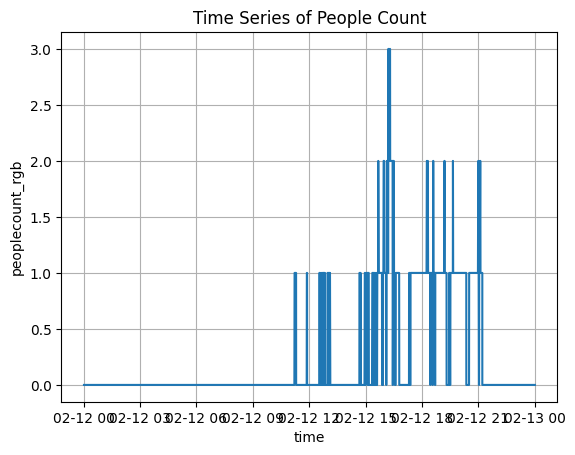

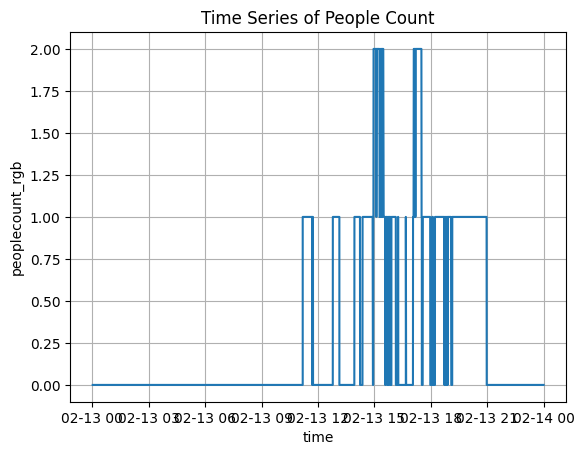

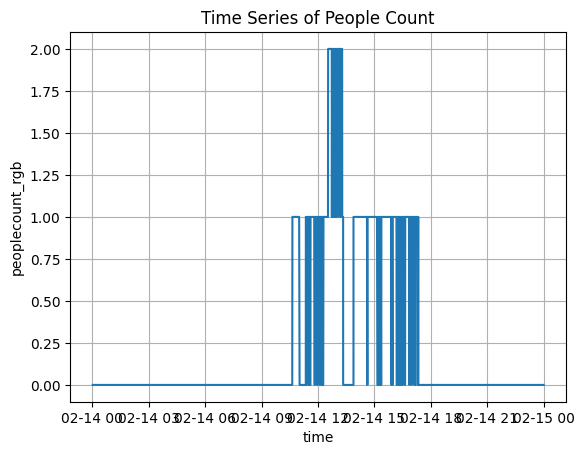

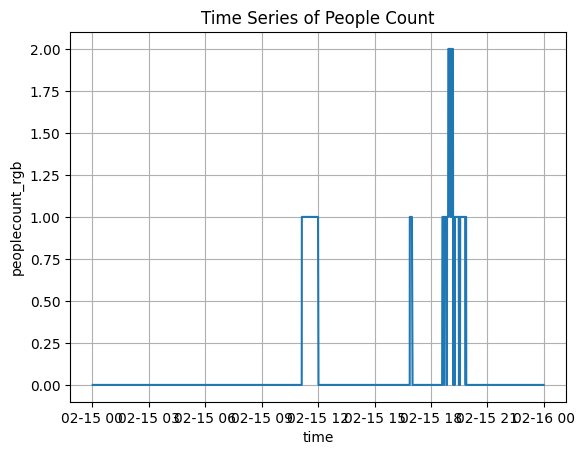

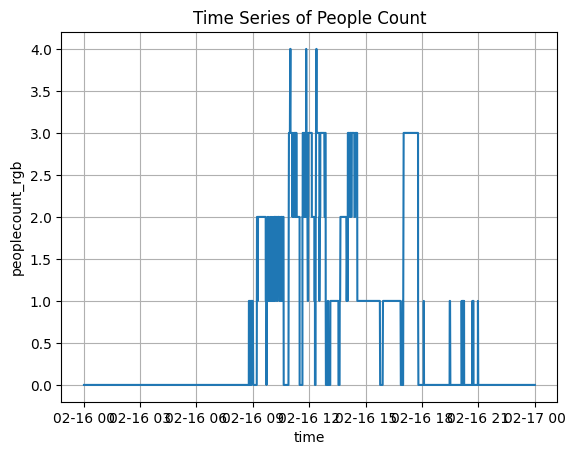

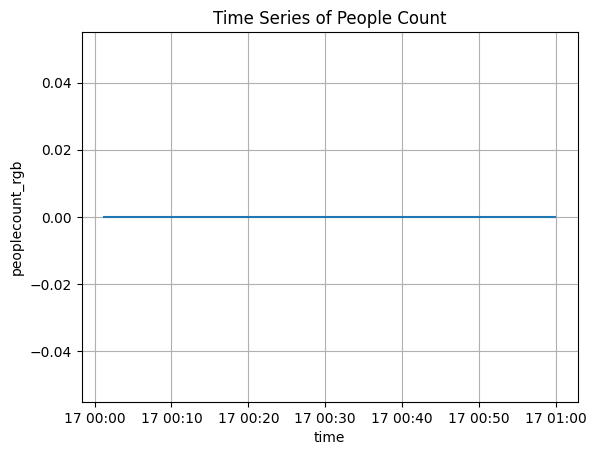

In [7]:
# plot time series of people count for each day
utils.plot_time_series_dbd(df)
utils.plot_time_series_dbd(df,matplotlib = True, first = False)

### CO2